In [38]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/sampled_machines_train.csv', index_col=0, parse_dates=['timestamp'])

set(df['object_id'])

/home/kiani/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


{107,
 111,
 112,
 205,
 210,
 211,
 216,
 305,
 308,
 405,
 409,
 429,
 436,
 910,
 913,
 924,
 940,
 946}

In [39]:
def calc_variances(x):
    med = np.median(x)
    neg_sum, pos_sum = [], []
    for i in x:
        if i < med:
            neg_sum.append((i - med) ** 2)
        else:
            pos_sum.append((i - med) ** 2)
    return np.mean(neg_sum), np.mean(pos_sum)


def plot_values(lb, ub, timestamps, values):
    colors = ['b' if lb <= x <= ub else 'r' for x in values]
    plt.axhline(ub)
    plt.axhline(lb)
    plt.title(calc_variances(np.array(values).flatten()))
    plt.scatter(x=timestamps, y=values, c=colors)
    plt.show()


def calc_relevant_bounds(lower_bound, upper_bound, values, variance_threshold):
    low_var, high_var = calc_variances(np.array(values).flatten())
    if high_var < variance_threshold:
        ub = float('inf')
    else:
        ub = np.percentile(values, upper_bound)
    if low_var < variance_threshold:
        lb = float('-inf')
    else:
        lb = np.percentile(values, lower_bound)
    return lb, ub


def plot_for_machine(machine, lower_bound=10, upper_bound=90, variance_threshold=0.1):
    machine_df = df[df['object_id'] == machine][['final_rinse_total_turbidity_liter', 'timestamp']].set_index(
        'timestamp').drop_duplicates()
    machine_df = machine_df.sort_index()
    timestamps = list(pd.to_datetime(machine_df.index))
    min_timestamp = min(timestamps)
    timestamps = list(map(lambda x: (x - min_timestamp).total_seconds(), timestamps))
    values = np.log(list(machine_df.values))

    lb, ub = calc_relevant_bounds(lower_bound, upper_bound, values, variance_threshold)

    plot_values(lb, ub, timestamps, values)


Plotting machine 405


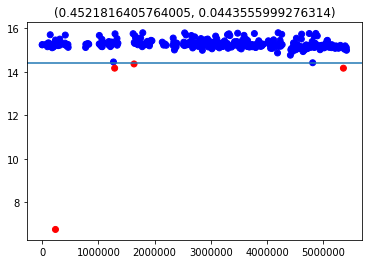

Plotting machine 111


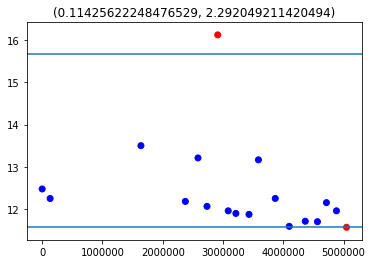

Plotting machine 924


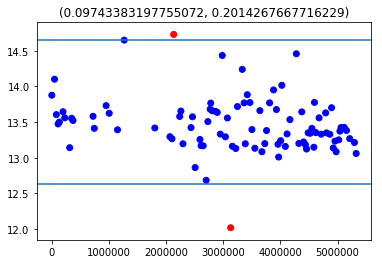

Plotting machine 112


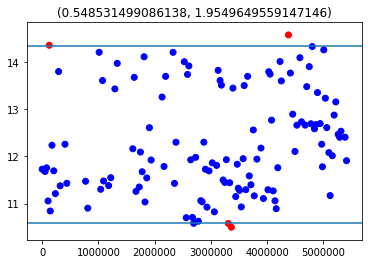

Plotting machine 913


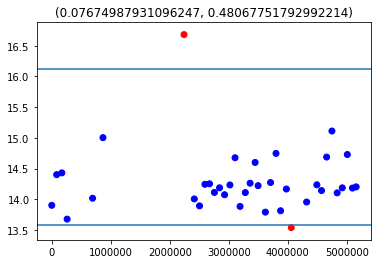

Plotting machine 216


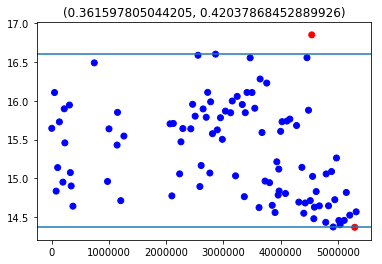

Plotting machine 946


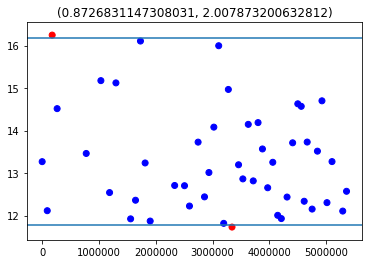

Plotting machine 940


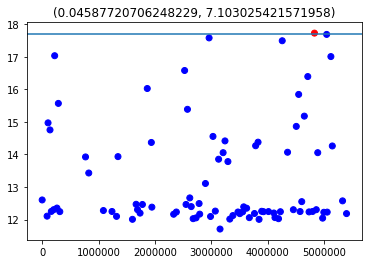

Plotting machine 308


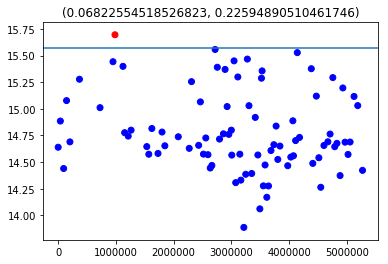

Plotting machine 205


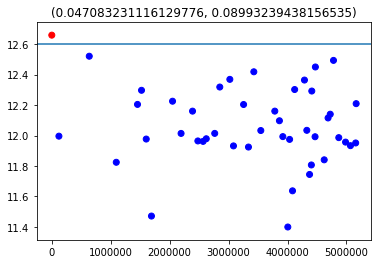

Plotting machine 211


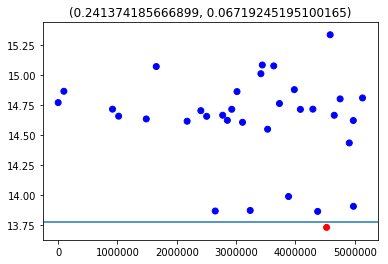

Plotting machine 305


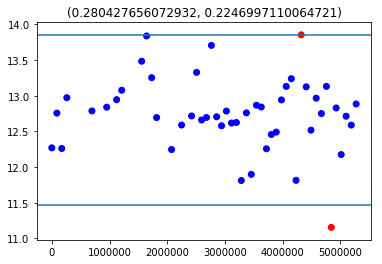

Plotting machine 210


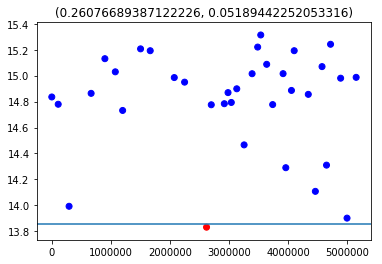

Plotting machine 409


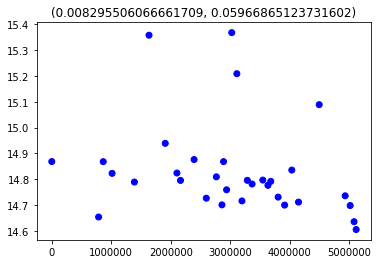

Plotting machine 429


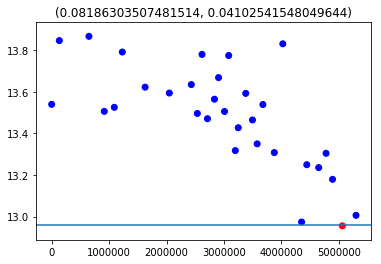

Plotting machine 107


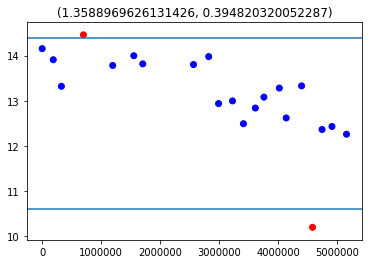

Plotting machine 910


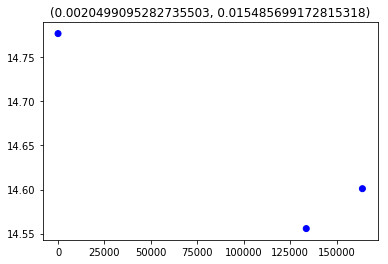

Plotting machine 436


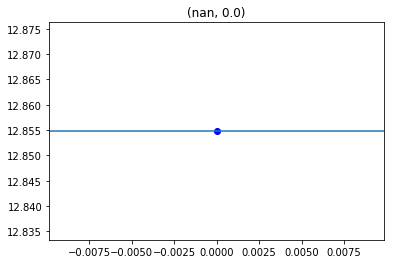

In [42]:
for machine in df['object_id'].unique():
    print("Plotting machine %s"%machine)
    plot_for_machine(machine, 1, 99, 0.07)

0.0